In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as smp

In [8]:
Pd, Ps, q = smp.symbols('Pd Ps q', real=True)

In [9]:
Pd = smp.Rational(-1,8)*q + 250
Ps = smp.Rational(1,12)*q + 16*smp.Rational(2,3)

In [10]:
x_range = np.linspace(0,2500,25)

In [11]:
demand_values = []
supply_values = []

In [12]:
for element in x_range:
    demand_values.append(Pd.subs(q, element).evalf())
    supply_values.append(Ps.subs(q, element).evalf())

In [13]:
demand = np.array(demand_values, dtype=float)
supply = np.array(supply_values, dtype=float)

In [27]:
#Find the equilibrium point

A = np.array([[1,1/8],[1,-1/12]], dtype=float)
B = np.array([250,32/3], dtype=float)

solutions = np.linalg.solve(A,B)

equil_q = solutions[1]
equil_price = solutions[0]




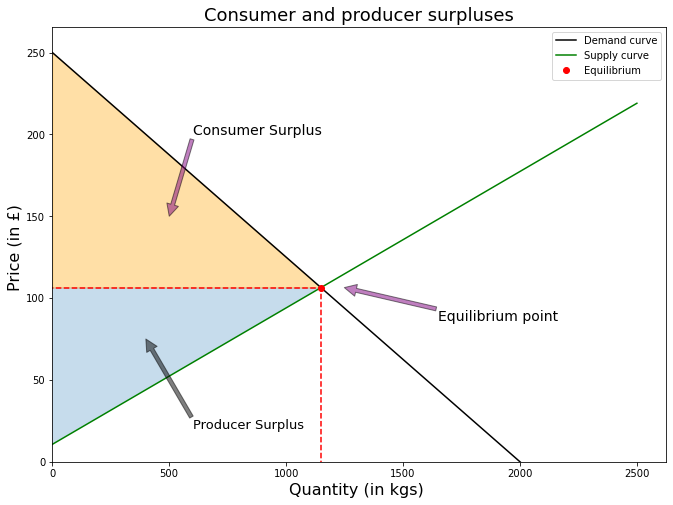

In [36]:
fig, ax = plt.subplots(1, figsize=(11,8))

plt.rcParams.update({'axes.titlesize':18, 'axes.labelsize': 16})

ax.plot(x_range,demand,color='black',label='Demand curve')
ax.plot(x_range,supply, color='green',label='Supply curve')
ax.set(title="Consumer and producer surpluses", ylabel="Price (in £) ", xlabel="Quantity (in kgs) ")
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.vlines(solutions[1],-80,solutions[0], linestyle='--' ,color='red')
ax.hlines(solutions[0],-120, solutions[1], linestyle='--',color='red')
ax.plot(solutions[1],solutions[0],'ro',label='Equilibrium')
ax.fill_between(x_range, demand, y2=solutions[0], where=(demand > solutions[0]),color='orange', alpha=0.35)
ax.fill_between(x_range, supply, y2=solutions[0], where=(supply < solutions[0]),alpha=0.25)
ax.annotate('Producer Surplus', xy=(400, 75), xytext=(600, 20), fontsize=13, arrowprops=dict(facecolor='black', alpha=0.50))
ax.annotate('Consumer Surplus', xy=(500,150), xytext=(600,200), fontsize=14, arrowprops=dict(facecolor='purple', alpha=0.50))
ax.annotate('Equilibrium point', xy=(solutions[1]+100,solutions[0]), xytext=(1650,solutions[0]-20), fontsize=14, arrowprops=dict(facecolor='purple',alpha=0.50))
ax.legend(fontsize=10)


## Calculating the consumer & producer surplus with integration

Consumer surplus is simply $\int_{0}^{Q^*}Q(d)dq - P^*Q^*$ 


In [28]:
consumer_surplus = smp.integrate(Pd,(q,0,equil_q)) - equil_q * equil_price

Producer surplus is simply $P^*Q^*-\int_{0}^{Q^*}Q(s)dq$ 

In [31]:
producer_surplus = equil_price * equil_q - smp.integrate(Ps, (q,0,equil_q))